<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Esteban Araneda
- Nombre de alumno 2: Ignacio Reyes


### **Link de repositorio de GitHub:** [GRUPO OVNI](https://github.com/estebanaraneda/MDS7202_OVNI)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [2]:
# !pip install xgboost

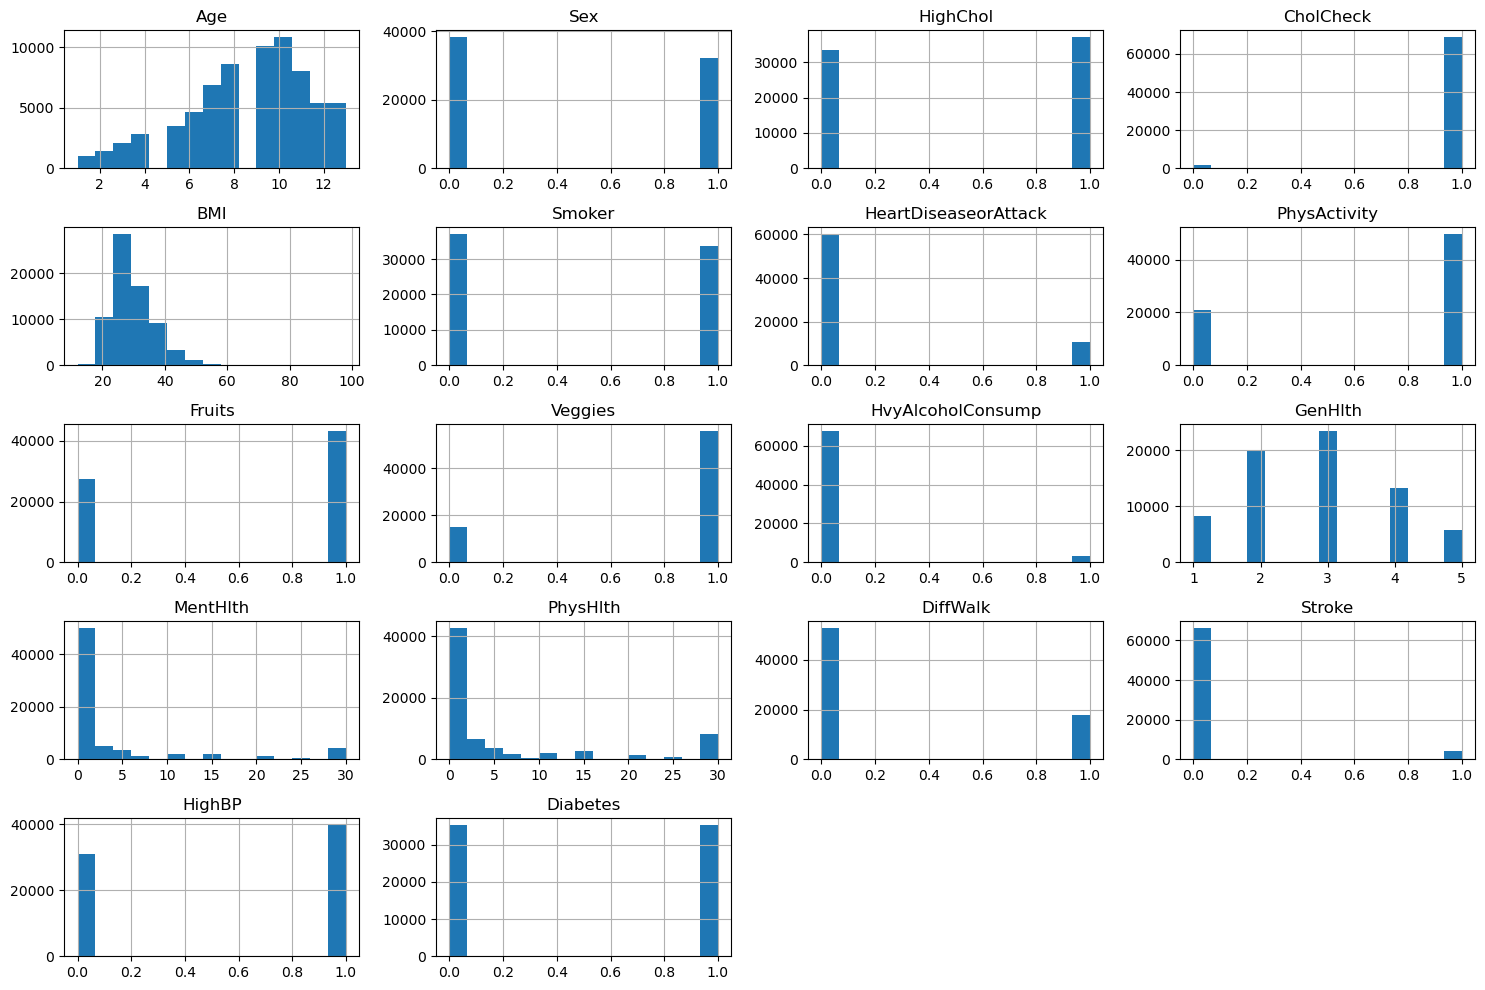

In [3]:
# Inserte su código aquí

# Histogramas de las variables
import matplotlib.pyplot as plt
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [4]:
# La mayoría de las cariables son booleanas (0 o 1), por lo que no tiene mucho sentido hacerles transformaciones númericas.
# Para BMI, Age, MentHith, GenHith, PhysHlth, se puede aplicar standard scaling para normalizarlas y que tengan el mismo peso en el modelo.
continuous_features = ['BMI', 'Age', 'MentHlth', 'GenHlth', 'PhysHlth']
boolean_features = df.columns.difference(continuous_features + ['Diabetes'])

# # boolean features to category
# for col in boolean_features:
#     df[col] = df[col].astype('category')

In [5]:
# Train, Test split
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Diabetes']).copy()
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

In [6]:
# Column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('bool', 'passthrough', boolean_features)
    ]).set_output(transform='pandas')

xgb_model = XGBClassifier(use_label_encoder=False, random_state=42)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Train the model
xgb_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bool', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [7]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = xgb_pipeline.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[8282 3500]
 [2492 9290]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     11782
         1.0       0.73      0.79      0.76     11782

    accuracy                           0.75     23564
   macro avg       0.75      0.75      0.75     23564
weighted avg       0.75      0.75      0.75     23564


Accuracy Score:
0.745713800712952


Para ser un primer modelo funciona bastante bien, obtiene un recall para la clase positiva (diabetes) de 0.79, lo que indica que el modelo es capaz de identificar correctamente el 79% de los casos positivos.  Aunque seguramente se pueda mejorar, es un buen punto de partida para un modelo inicial.

*  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)

Sí, el modelo parece ser un buen predictor de diabetes, especialmente considerando el recall de 0.79 para la clase positiva. Esto indica que el modelo es capaz de identificar correctamente el 79% de los casos positivos, lo cual es crucial en un contexto médico donde es importante minimizar los falsos negativos (es decir, casos de diabetes que no son detectados por el modelo).

* ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)

El recall busca explicar la capacidad del modelo para identificar correctamente los casos positivos (diabetes). La precisión mide la proporción de predicciones positivas que son correctas, lo cual es importante para entender cuántos de los casos que el modelo predice como positivos realmente tienen diabetes. El F1-score es una métrica que combina tanto la precisión como el recall, proporcionando una visión equilibrada del desempeño del modelo. Mientras que el accuracy mide la proporción total de predicciones correctas, tanto positivas como negativas.

* ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

Las métricas utilizadas proporcionan una buena indicación del desempeño general del modelo, pero no aseguran que el modelo haya hecho una buena elección de las features. 

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

<Figure size 1000x800 with 0 Axes>

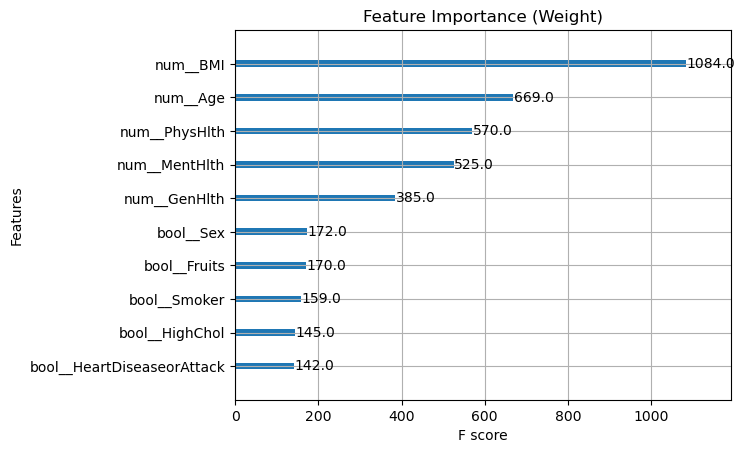

<Figure size 1000x800 with 0 Axes>

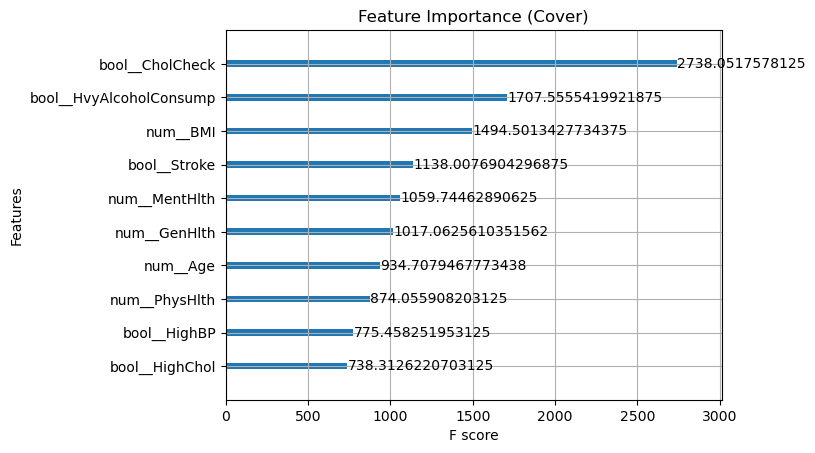

<Figure size 1000x800 with 0 Axes>

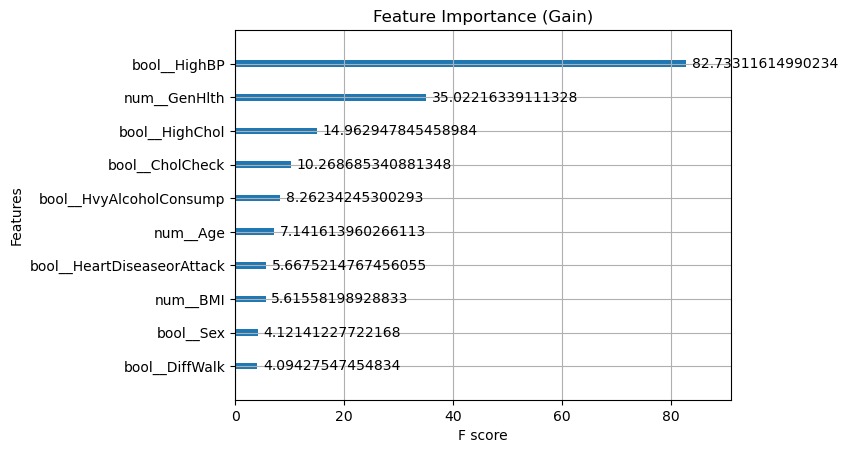

In [8]:
# Inserte su código aquí
# 1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features**
# del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`.
# `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)

import matplotlib.pyplot as plt
from xgboost import plot_importance

# Obtener el modelo entrenado
trained_model = xgb_pipeline.named_steps['classifier']

# Graficar la importancia de las features
plt.figure(figsize=(10, 8))
plot_importance(trained_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance (Weight)')
plt.show()

plt.figure(figsize=(10, 8))
plot_importance(trained_model, importance_type='cover', max_num_features=10)
plt.title('Feature Importance (Cover)')
plt.show()

plt.figure(figsize=(10, 8))
plot_importance(trained_model, importance_type='gain', max_num_features=10)
plt.title('Feature Importance (Gain)')
plt.show()

2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)

Los resultados no son completamente compatibles entre los diferentes métodos de importancia de características en XGBoost. Ya que cada metodo resalta features diferentes.

La desigualdad en los resultados se debe a la forma en que cada método calcula la importancia. 
Por ejemplo, el método "weight" se basa en la cantidad de veces que una característica se utiliza para dividir los datos, 
mientras que "cover" considera la cantidad de datos que pasan por esa característica y "gain" evalúa la mejora en la precisión 
que aporta la característica. Estas diferencias en los enfoques pueden llevar a variaciones en los resultados, pero en general, 
las características más relevantes para el modelo tienden a ser consistentes entre los diferentes métodos.

3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)
Las importancias obtenidas funcionan como un proxy para entender qué características son más relevantes en el modelo, pero no proporcionan una interpretabilidad completa del modelo. Ya que como se vio cada metodo resalta diferentes features como importantes, lo que puede llevar a confusión sobre cuáles son realmente las más críticas para las predicciones del modelo.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [9]:
# Inserte su código aquí
# 1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación**
# que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. 
# `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)

from sklearn.inspection import permutation_importance
# Obtener el modelo entrenado
trained_model = xgb_pipeline.named_steps['classifier']
# Obtener los nombres de las características en el orden correcto
feature_names = trained_model.get_booster().feature_names
# Datos preprocesados
X_train_processed = xgb_pipeline.named_steps['preprocessor'].transform(X_train)
X_test_processed = xgb_pipeline.named_steps['preprocessor'].transform(X_test)

# Calcular la importancia por permutación
result = permutation_importance(trained_model, X_test_processed, y_test, random_state=42)
# Crear un DataFrame para visualizar los resultados
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': result.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                       Feature  Importance
3                 num__GenHlth    0.056281
0                     num__BMI    0.030037
1                     num__Age    0.027389
9                 bool__HighBP    0.017196
10              bool__HighChol    0.012264
8   bool__HeartDiseaseorAttack    0.004481
11     bool__HvyAlcoholConsump    0.003607
5              bool__CholCheck    0.003539
13                   bool__Sex    0.003242
6               bool__DiffWalk    0.002512
4                num__PhysHlth    0.002241
15                bool__Stroke    0.001536
16               bool__Veggies    0.000806
2                num__MentHlth    0.000747
7                 bool__Fruits    0.000280
12          bool__PhysActivity    0.000255
14                bool__Smoker    0.000204


In [10]:
# 2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)

importance_list = []
for i in range(30):
    # Permutation importance
    result = permutation_importance(trained_model, X_test_processed, y_test, random_state=i)
    # Crear un DataFrame para visualizar los resultados
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': result.importances_mean})
    importance_list.append(importance_df)

# Calcular la desviación estándar de las importancias
std_df = pd.concat(importance_list).groupby('Feature').std().reset_index()
mean_df = pd.concat(importance_list).groupby('Feature').mean().reset_index()
std_df = std_df.merge(mean_df, on='Feature', suffixes=('_Std', '_Mean'))
std_df.columns = ['Feature', 'Importance_Std', 'Importance_Mean']
std_df = std_df.sort_values(by='Importance_Mean', ascending=False)
print(std_df)
    

                       Feature  Importance_Std  Importance_Mean
14                num__GenHlth        0.000813         0.055758
13                    num__BMI        0.000757         0.030831
12                    num__Age        0.000743         0.028091
4                 bool__HighBP        0.000480         0.016110
5               bool__HighChol        0.000491         0.012027
3   bool__HeartDiseaseorAttack        0.000287         0.004754
0              bool__CholCheck        0.000260         0.003740
6      bool__HvyAlcoholConsump        0.000249         0.003545
8                    bool__Sex        0.000386         0.003218
1               bool__DiffWalk        0.000315         0.002374
16               num__PhysHlth        0.000449         0.002290
10                bool__Stroke        0.000198         0.001301
11               bool__Veggies        0.000209         0.000460
7           bool__PhysActivity        0.000275         0.000350
15               num__MentHlth        0.

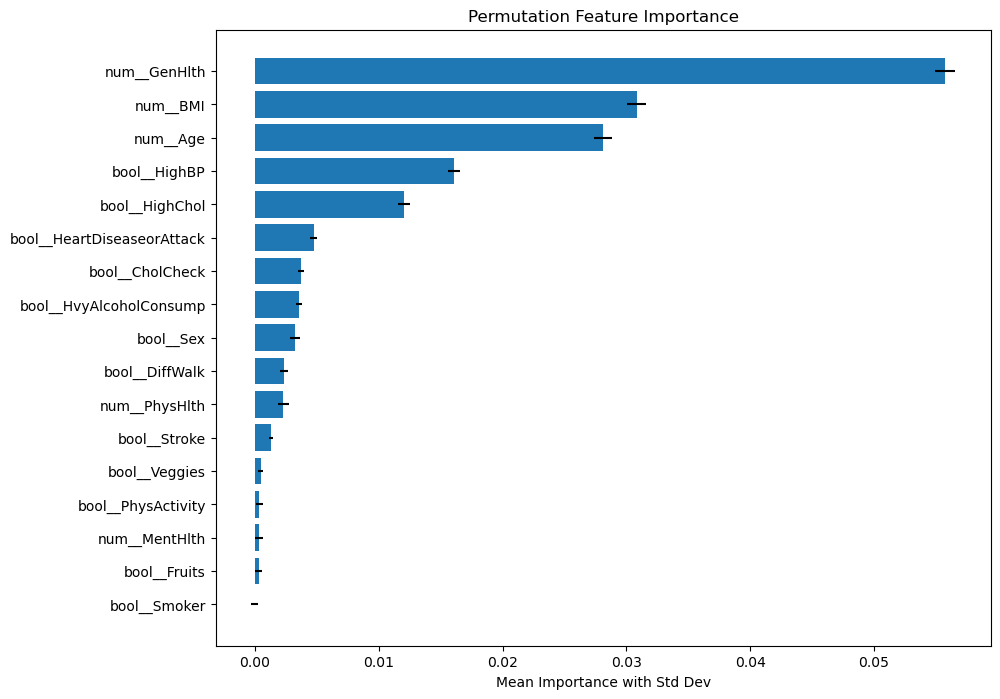

In [11]:
# 3. Visualice los resultados de este método en un gráfico. (2 puntos)
inverted_std_df = std_df.sort_values(by='Importance_Mean', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(inverted_std_df['Feature'], inverted_std_df['Importance_Mean'], xerr=inverted_std_df['Importance_Std'])
plt.xlabel('Mean Importance with Std Dev')
plt.title('Permutation Feature Importance')
plt.show()

4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
    - La importancia de las características se mide evaluando el impacto en el rendimiento del modelo cuando se permuta (mezcla) aleatoriamente los valores de una característica específica. Si la permutación de una característica impacta significativamente el rendimiento del modelo, se considera que esa característica es importante.
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
    - Las 5 características con mayor impacto son: GenHlth, BMI. AGE. HighBP y HighChol. Todas estas características tienen sentido en el contexto de la diabetes, ya que están relacionadas con factores de riesgo conocidos para la enfermedad.
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
    - Las conclusiones cambian en el sentido de que el método de permutación proporciona un metodo más confiable para evaluar la importancia de las caracteristicas, ya que entre las diferentes corridas del modelo, las características más importantes tienden a ser consistentes.
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)
    - Ventajas:
      1. **NO depende del modelo**: No depende del modelo específico, lo que permite su aplicación a cualquier tipo de modelo.
      2. **Interpretabilidad**: Proporciona una medida clara de la importancia de cada característica en términos de su impacto en el rendimiento del modelo.
      3. **Robustez**: Al repetir el proceso varias veces y calcular la desviación estándar, se obtiene una medida más robusta de la importancia de las características.
    - Desventajas:
      1. **Correlación**: Si las características están altamente correlacionadas, la permutación de una característica puede no reflejar adecuadamente su importancia real, ya que otras características correlacionadas pueden compensar su impacto.
      2. **Computacionalmente Costoso**: Es más lento que la importancia de características basada en el modelo.
      3. **Tamaño de muestra**: Requiere un tamaño de muestra suficientemente grande para obtener resultados confiables.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [12]:
# !pip install shap

In [13]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [14]:
# Inserte código para calcular shapley values aquí
# 1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar 
# las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). 
# Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)

import shap

explainer = shap.Explainer(trained_model)
shap_values = explainer(X_test_processed)
shap_values

.values =
array([[-3.5910639e-01,  4.3629069e-02,  4.5114577e-02, ...,
         1.6373530e-02, -1.4081961e-02, -2.4079265e-02],
       [ 2.2966735e-02,  1.7948443e-01, -2.1741351e-02, ...,
        -2.1379359e-02,  2.0250745e-01,  1.0510066e-01],
       [ 1.0940479e+00,  2.3022427e-01,  2.1085534e-02, ...,
        -3.3283424e-02, -1.5104111e-02, -3.6031358e-02],
       ...,
       [-9.9384016e-04,  3.2852730e-01, -3.7877554e-01, ...,
         2.6769448e-02, -3.2266587e-02, -4.5429599e-02],
       [-1.5886149e-01, -1.5644661e+00,  8.3815530e-02, ...,
         2.3092825e-02, -2.1672046e-02,  1.4466077e-02],
       [ 6.6315591e-02, -1.0838214e+00,  8.2272321e-02, ...,
        -6.2979567e-03, -1.8080087e-02,  6.6055030e-02]], dtype=float32)

.base_values =
array([-0.00832188, -0.00832188, -0.00832188, ..., -0.00832188,
       -0.00832188, -0.00832188], dtype=float32)

.data =
array([[-0.54002209,  0.14757302, -0.45821295, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.02235

2. ¿Qué representa cada número en su resultado? (1 punto)

Cada número en el resultado de los SHAP values representa la contribución de cada característica a la predicción del modelo para un paciente específico, este valor es la cantidad que se suma (o resta) a la predicción base del modelo para llegar a la predicción final para ese paciente.

3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto) 

Sí, es posible atribuir un significado a la positividad o negatividad de cada valor SHAP. Un valor SHAP positivo indica que la característica contribuye a aumentar la predicción del modelo para ese paciente, mientras que un valor SHAP negativo indica que la característica contribuye a disminuir la predicción del modelo.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

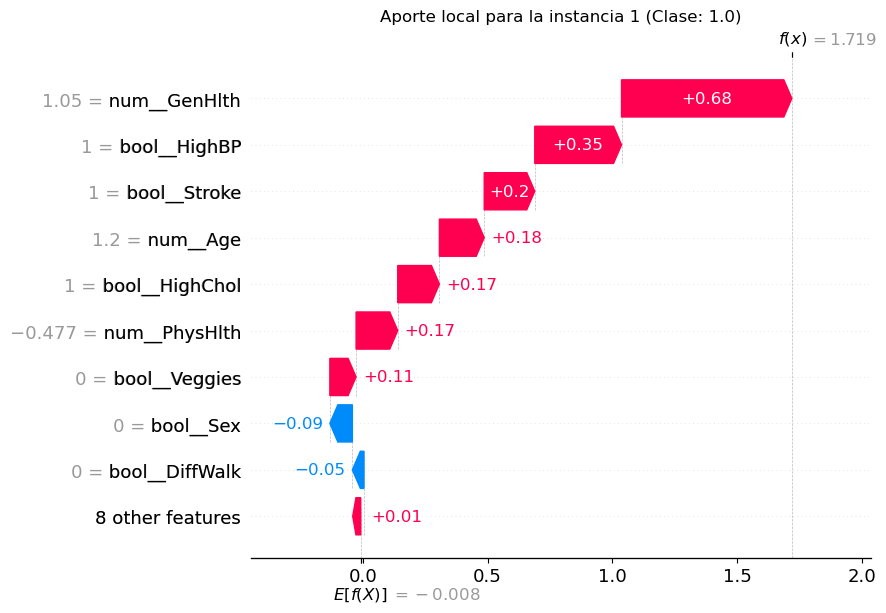

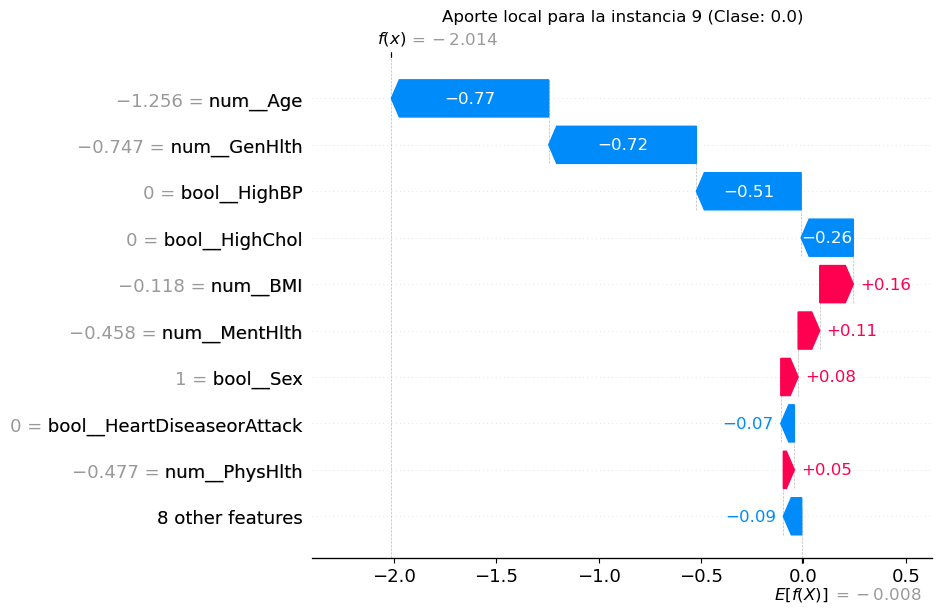

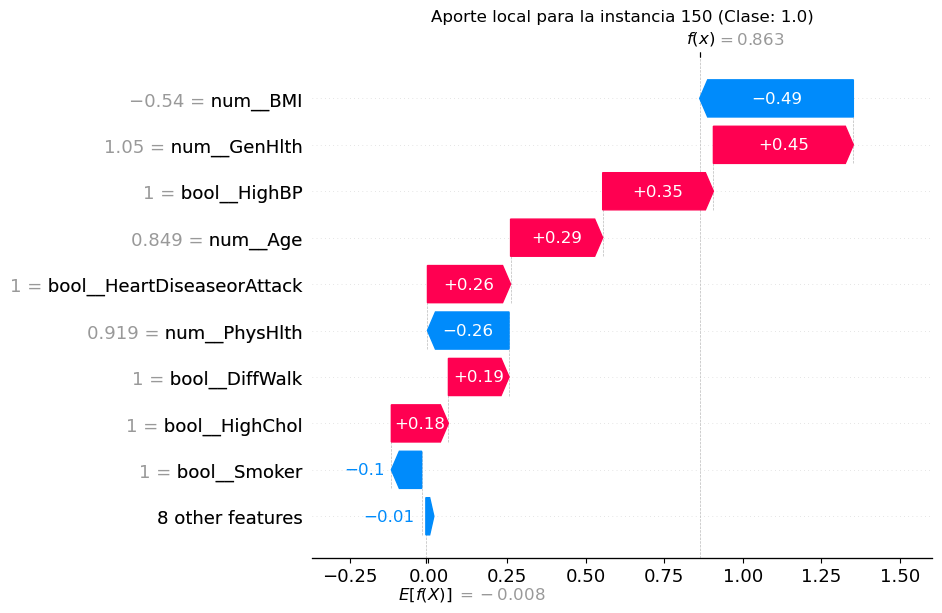

In [15]:
# Inserte código para generar gráficos de aporte local aquí
# 1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

import matplotlib.pyplot as plt

# Seleccionar las instancias de interés
instances_of_interest = [1, 9, 150]

# Crear gráficos de barras para cada instancia
for i in instances_of_interest:
    plt.title(f"Aporte local para la instancia {i} (Clase: {y_test.iloc[i]})")
    shap.waterfall_plot(shap_values[i])


2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)
    - Valores elevados de GenHlth, BMI, Age y unos en HighBP y HighChol afectan de manera positiva a la probabilidad de poseer diabetes. Mientras que valores altos de PhysHlth y MentHlth afectan de manera negativa a la probabilidad de poseer diabetes.

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)
    - Un patrón común entre las instancias analizadas es que  las instancias con diabetes tienden a tener valores altos en GenHlth, BMI y Age, así como la presencia de factores de riesgo como HighBP y HighChol.

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)
    - De tres pacientes solamente no es posible generalizar las conclusiones a todo el dataset. Pero si se analizaran más instancias unicas si se podrían generalizar las conclusiones a todo el dataset.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

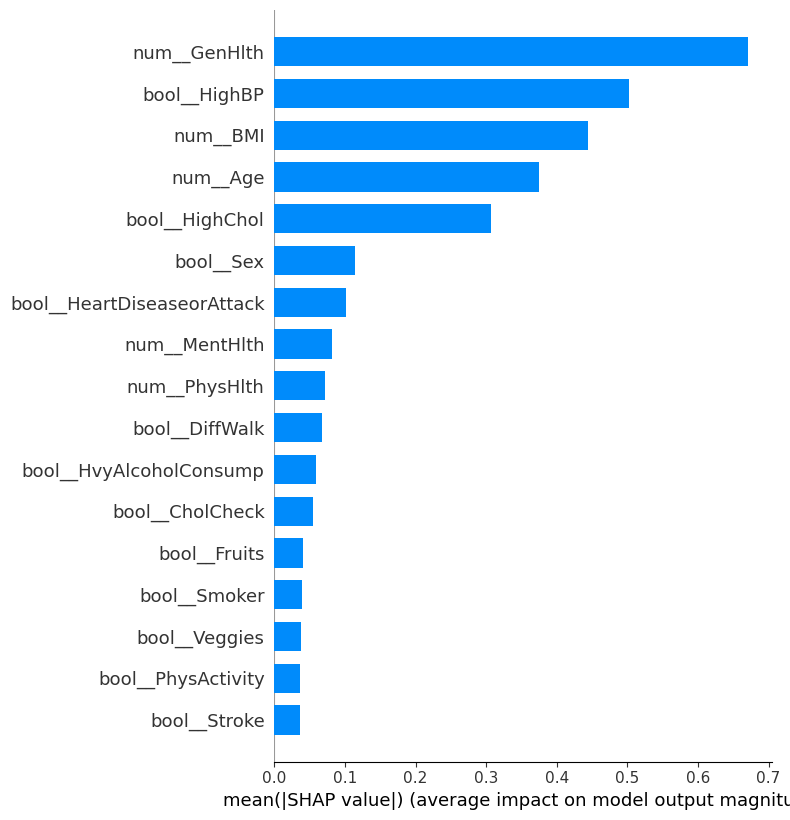

In [16]:
# Inserte código para generar gráficos de aporte global aquí
# 2. Genere un gráfico de **aporte global** para su modelo (1 punto).
shap.summary_plot(shap_values, X_test_processed, plot_type="bar")

El gráfico global es bastante similar al gráfico de importancia por permutación, ya que ambos métodos resaltan las características más importantes para el modelo. Sin embargo como el gráfico global resalta promedios de todas las instancias, puede suavizar algunas variaciones que pueden ser importantes a nivel individual. Por ejemplo, una característica que es muy importante para un subconjunto específico de pacientes puede no parecer tan crucial en el gráfico global.

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

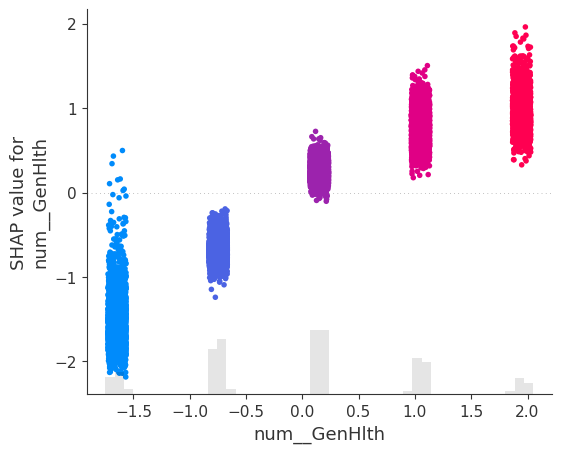

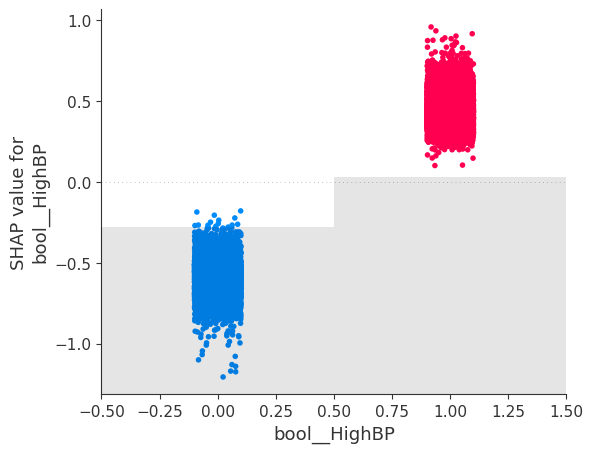

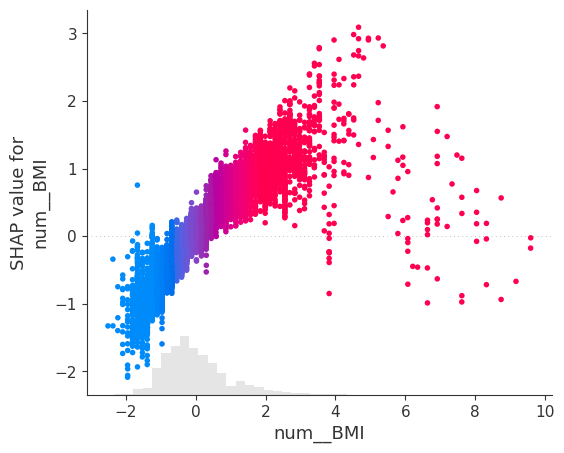

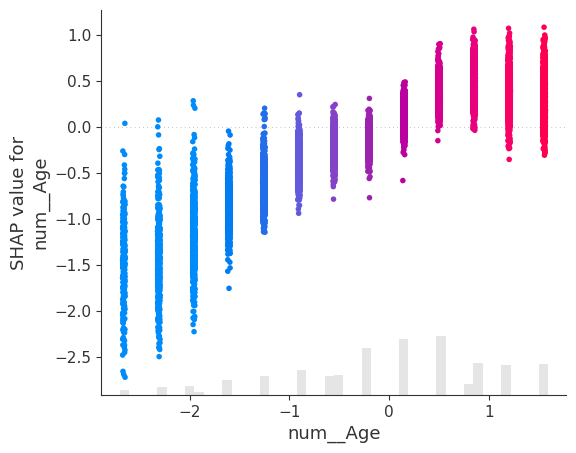

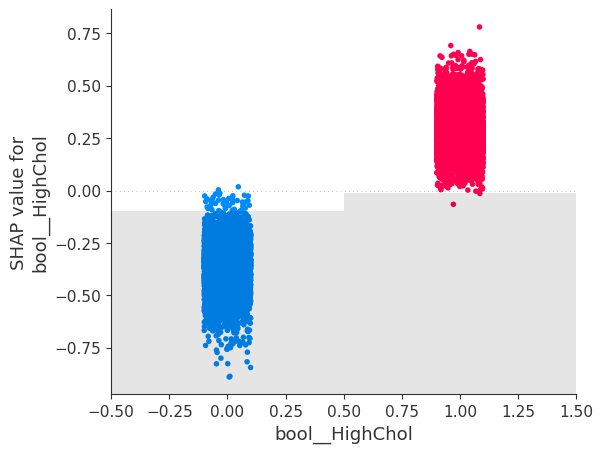

In [29]:
# Inserte código para generar gráficos de feature vs shap value aquí
for i in ["num__GenHlth","bool__HighBP", "num__BMI","num__Age","bool__HighChol"]:
    shap.plots.scatter(shap_values[:, i], color=shap_values.base_values)

Se muestran marcadas diferencias donde 

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

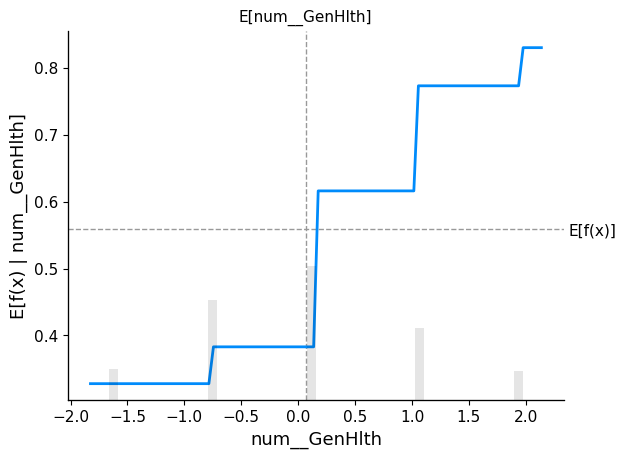

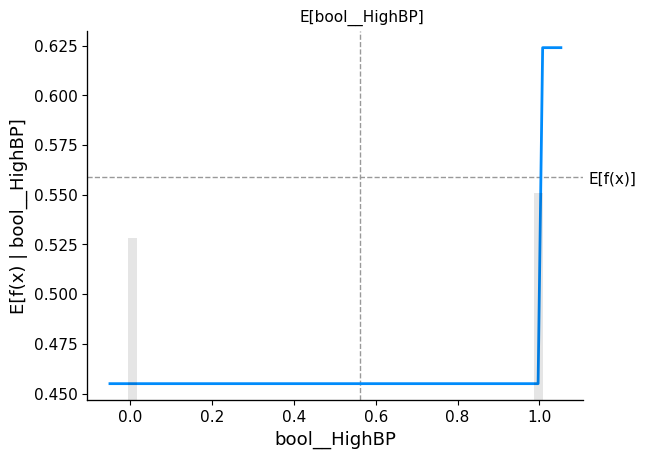

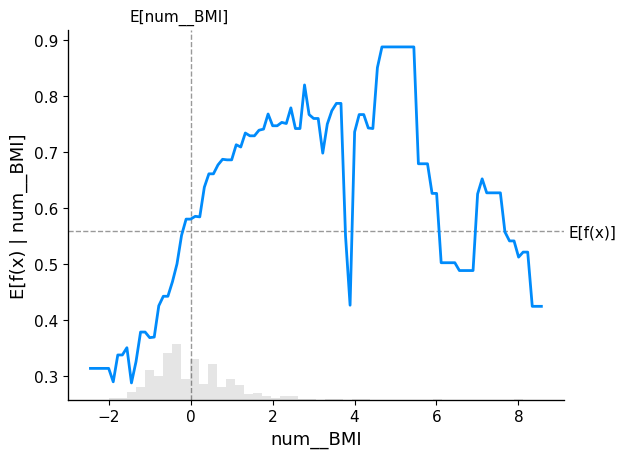

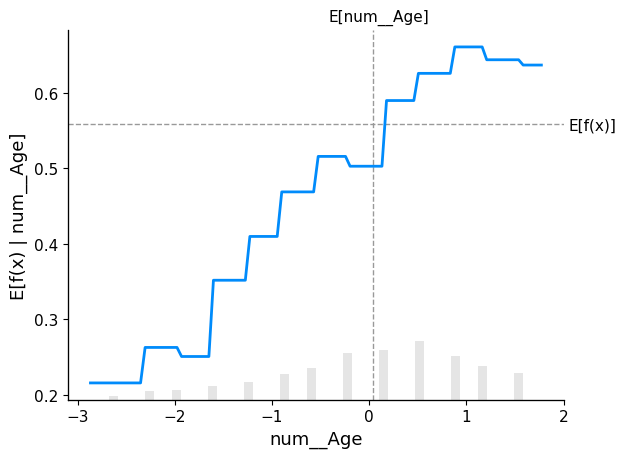

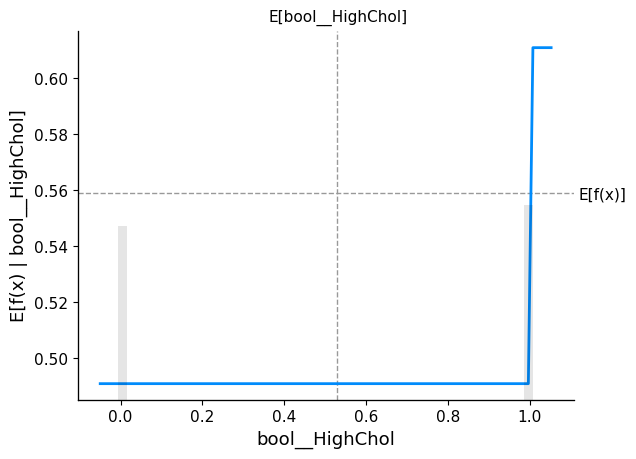

In [32]:
# Inserte código para generar gráficos PDP aquí
X100 = shap.utils.sample(X_test_processed, 1000)  # 1000 instances for use as the background distribution
for i in ["num__GenHlth","bool__HighBP", "num__BMI","num__Age","bool__HighChol"]:
    shap.partial_dependence_plot(i,trained_model.predict, X100,ice=False,model_expected_value=True,feature_expected_value=True)

La relación entre las features y las salidas están mostradas en la intersección de las lineas segmentadas. Esto se aleja de la intersección para datos discretos y se acerca para features continuas. En cuanto a generalización el comportamiento no está dado por la submuestra, sinó por las caracteristicas intrinsicas del feature.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [33]:
#!pip install alibi

INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of spacy[lookups] to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/6.6 MB ? eta -:--:--
   ----------------- ---------------------- 2.9/6.6 MB 14.0 MB/s eta 0:00:01
   ------------------------- -------------- 4.2/6.6 MB 11.0 MB/s eta 0:00:01
   ------------------------- -------------- 4.2/6.6 MB 11.0 MB/s eta 0:00:01
   --------------

  You can safely remove it manually.


In [34]:
from alibi.explainers import AnchorTabular

In [41]:
# Inserte su código para generar sistema de reglas aquí
predict_fn = lambda x: trained_model.predict(x) # creamos función de predicción
explainer = AnchorTabular(predict_fn, X_train_processed.columns, seed=1) # instanciamos Anchor usando función creada
explainer.fit(X_train_processed.to_numpy()) # sobre los datos

idx = 1000
print("explicar predicción idx 1000")
obs = np.array(X_test_processed.iloc[idx], ndmin = 2) # array de la obs
# generar anchor
explanation = explainer.explain(obs, # obs a explicar
                                threshold=0.95, # min precision de anchor
                                )

print('Prediction: ', explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo 
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla 
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura

idx = 3001
print("explicar predicción idx 3001")
obs = np.array(X_test_processed.iloc[idx], ndmin = 2) # array de la obs
# generar anchor
explanation = explainer.explain(obs, # obs a explicar
                                threshold=0.95, # min precision de anchor
                                )

print('Prediction: ', explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo 
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla 
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura
idx = 5751
print("explicar predicción idx 5751")
obs = np.array(X_test_processed.iloc[idx], ndmin = 2) # array de la obs
# generar anchor
explanation = explainer.explain(obs, # obs a explicar
                                threshold=0.95, # min precision de anchor
                                )

print('Prediction: ', explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo 
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla 
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura

explicar predicción idx 1000
Prediction:  1
Anchor: num__GenHlth > -0.75 AND bool__DiffWalk > 0.00 AND num__BMI > -0.68 AND num__Age > 0.15
Precision: 0.98
Coverage: 0.09
explicar predicción idx 3001
Prediction:  0
Anchor: num__GenHlth > -0.75 AND bool__HighBP > 0.00 AND num__Age > -0.55 AND num__BMI > -0.68
Precision: 0.97
Coverage: 0.27
explicar predicción idx 5751
Prediction:  1
Anchor: num__GenHlth > 0.15 AND bool__HeartDiseaseorAttack > 0.00
Precision: 0.98
Coverage: 0.08


Se puede explicar entre el 8% al 27%, pero en estos casos  se alcanza una precisión del 98%. Esto quiere decir que individualmente cada anchor es inutil por si solo, dejando más de tres cuartos del dataset no explicado, pero estaremos seguros al 97% que aquellos datos dentro del alnclaje están bien clasificados. Por lo tanto las reglas tienen sentido en forma local.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>